<h1><center>K-Nearest Neighbors</center></h1>

### Learning Objective:
- Learn how to implement the KNN algorighm by cleaning, preparing, modeling, and evaluating the data 

### Offical Defnintion:
- is an algorithm for supervised learning. Where the data is 'trained' with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification.

### Visualization
<img src="https://ibm.box.com/shared/static/mgkn92xck0z05v7yjq8pqziukxvc2461.png" style="width: 300px;"> 
<br>

> Notes:
- The value of K determines the classifcation of the prediction
- It considers the 'K' Nearest Neighbors (points) when it predicts the classification of the test point

### Procedure
<img src="images/KNN algo.png" style="width: 400px;"> 

In [1]:
import numpy as np
import pandas as pd
import numpy as np

# first time working w/ these modules, 
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import itertools
from sklearn import preprocessing

%matplotlib inline

***
### About the dataset
[data source]( https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv)

<img src="images/KNN dataset.png" style="width: 600px;"> 

Objective:
- Predict the output (customer category) from the features in row 8

***

In [4]:
df = pd.read_csv('datasets/teleCust1000t.csv')
df.head(2)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4


***
#### Count occurrance of each value of the output wanted

- df['column'].value_counts()
***

In [9]:
print(df.shape)
df['custcat'].value_counts()

(1000, 12)


3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

***
- 281 -- 3 - Plus Service 
- 266 -- 1 -  Basic-service
- 236 -- 4 -  Total Service
- 217 -- 2 -  E-Service customers
***

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

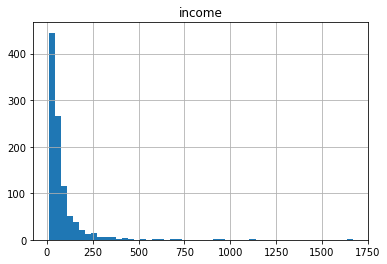

In [6]:
df.hist(column='income', bins=50)

***
### Clean the data
- convert the values of the features into an array
- convert the values of the outcome into an array
***

In [7]:
# populate the column headers
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [13]:
x = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values
x[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [21]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

***
### Prepare the Data
- compute the mean w/ .fit()
- standardize and scale vectors w/ .transform()

from the docs:
> - sklearn.preprocessing.StandardScaler(*, copy=True, with_mean=True, with_std=True)

> - Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

> - Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

methods:

> - fit(X[, y]) : Compute the mean and std to be used for later scaling.
> - fit_transform(X[, y]) : Fit to data, then transform it.
> - get_params([deep]) : Get parameters for this estimator.
> - inverse_transform(X[, copy]) : Scale back the data to the original representation
> - partial_fit(X[, y]) : Online computation of mean and std on X for later scaling.
> - set_params(**params) : Set the parameters of this estimator.
> - transform(X[, copy]) : Perform standardization by centering and scaling

***

In [18]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit(x).transform(x.astype(float))
x[0:2]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158]])

*** 
### Prep the data - split into test/train sets
sklearn.model_selection.train_test_split(*arrays, **options)

from the docs:
    
> Parameters:
<br>
> *arrayssequence of indexables with same length / shape[0]
> Allowed inputs are lists, numpy arrays, scipy-sparse matrices or pandas dataframes.

> - test_size : float or int, default=None

> If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.

> - train_size : float or int, default=None

> If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split. If int, represents the absolute number of train samples. If None, the value is automatically set to the complement of the test size.

> - random_state : int or RandomState instance, default=None

> Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls. See Glossary.

> - shuffle : bool, default=True

> Whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.

> - stratify : array-like, default=None

> If not None, data is split in a stratified fashion, using this as the class labels.

- sklearn.model_selection.train_test_split() is equivalent to the Numpy split version: (np.random.rand(len(df))< .80 )

***

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


***
### Model the data - Training

- sklearn.neighbors.KNeighborsClassifier

class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs

from the docs:

> Parameters

> - n_neighbors : int, default=5
Number of neighbors to use by default for kneighbors queries.

> - weights : {‘uniform’, ‘distance’} or callable, default=’uniform’
weight function used in prediction. Possible values:

> - ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

> - ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

> - [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.

> - algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
Algorithm used to compute the nearest neighbors:
> - ‘ball_tree’ will use BallTree
> - ‘kd_tree’ will use KDTree
> - ‘brute’ will use a brute-force search.
> - ‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.
Note: fitting on sparse input will override the setting of this parameter, using brute force.

> - leaf_size : int, default=30
> - Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

****


****
### Step 1: Choose a K or log(n)
- typically log(n) = K
-fit the data using fit()
****

### Model the data - Prediction
- use .predict to predict y_hat(outcome)
***

In [47]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

k = int(np.log(y.size))

neighbors = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
y_hat = neighbors.predict(x_test)
y_hat[0:5]

array([3, 3, 3, 4, 4])

***
### Evaluation
In multilabel classification, __accuracy classification score__ is a function that computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

- sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)

from the docs:

> Parameters
> - y_true : 1d array-like, or label indicator array / sparse matrix
> Ground truth (correct) labels.

> - y_pred : 1d array-like, or label indicator array / sparse matrix
> Predicted labels, as returned by a classifier.

> - normalize : bool, optional (default=True)
> If False, return the number of correctly classified samples. Otherwise, return the fraction of correctly classified samples.

> - sample_weight : array-like of shape (n_samples,), default=None
> Sample weights.


In [51]:
from sklearn import model_selection, preprocessing, metrics

#.predict uses x features
training = metrics.accuracy_score(y_train, neighbors.predict(x_train))
test = metrics.accuracy_score(y_test, y_hat)
print('Training accuracy: ', training)
print('Testing accuracy: ', test)

Training accuracy:  0.51625
Testing accuracy:  0.31


In [44]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neighbors.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, neighbors.predict(x_test)))
print("Test set Accuracy using yhat: ", metrics.accuracy_score(y_test, y_hat))

Train set Accuracy:  0.51625
Test set Accuracy:  0.31
Test set Accuracy using yhat:  0.31


***
### Results

- K of 5 provides slighlty better resultes but log(n) scales better with larget input values

In [52]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_hat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(y_hat.shape[0])

mean_acc

array([0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31])

#### Plot  model accuracy  for Different number of Neighbors 

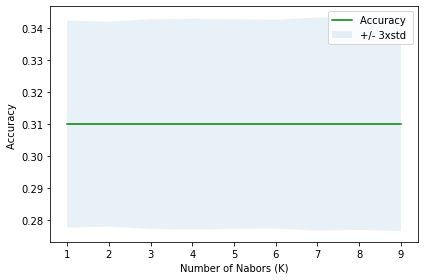

In [53]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [54]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.31 with k= 1


<h2>Disclaimer</h2>

This script was orginally from Coursera's [IBM AI Engineering course](https://www.coursera.org/professional-certificates/ai-engineer), authored by <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a> and was modifed to fit my needs. 